# The Three Body Problem  
Using Verlet intergration evolve a 3 body system for position and velocity.  
Calculate angular momentum of the bodies.  
Calculate total energy (potential and kinetic).  
### Verlet  
velocity half step  
$ v_{n+\frac{1}{2}} = v_n +\frac{1}{2} ha (x_n) $  
$ x_{n+1} = x_n +hv_{n+\frac{1}{2}} $  
$ v_{n+1} = v_{n+\frac{1}{2}} +\frac{1}{2} ha (x_{n+1}) $  

$ h $ is timestep  
$ a(x) $ is acceleration at point x. I will calulate using the force function defined near the top, and divide it by mass. So that it in keeping with the other solvers here.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sc
from cycler import cycler
import pandas as pd

In [2]:
def Data_save(p, v, E, L, t, f_name):
    """Function for saving positions, velocity, energy and angular momentum produced to a txt file.
    IN:
        p: An array holding all of the positions of that timestep. Cartesain
        v: An array holding all the velocities of that timestep. Cartesain
        E: Total energy of the system
        L: Total angular momentum of the system
        t: Time of the particular step
        f_name: The file the data is being saved to."""
    f = open(f_name, "a")
    f.write("\n" + f"{p[0,0]}" + "\t" + f"{p[0,1]}" + "\t" + f"{p[1,0]}" + "\t" + f"{p[1,1]}")
    f.write("\t" + f"{v[0,0]}" + "\t" + f"{v[0,1]}" + "\t" + f"{v[1,0]}" + "\t" + f"{v[1,1]}")
    f.write("\t" + f"{E}" + "\t" + f"{L}" + "\t" +f"{t}")
    f.close()
    

In [3]:
def Grav_eng(pos_e, ma_e, pos_other, ma_other, ep, G):
    """Grav_eng(pos_e, ma_e, pos_other, ma_other):
    Calculates tthe gravtiational energy between two bodies.
    U = -GMm/(r+ep)
    IN:
        pos_e: position of the planet in question. [x,y]
        ma_e: mas of the planet in question.
        pos_other: position of the other planet. [x,y]
        ma_other: mas of the other planet.
        ep: extra bit to make sure the numbers dont blow up to much at low distances.
        G: GRavitational constant.
    OUT:
        g_e: gravitational potential energy."""
    
    dif = pos_other-pos_e
    g_e = (-G * ma_e *ma_other) / (np.linalg.norm(dif+ep))

    return g_e

In [4]:
def Kin_eng(vel_e, m_e):
    """Kin_eng(vel_e, m_e):
    Calculate the kinetic energy.
    E = 0.5mv^2
    IN:
        vel_e: velocity of a body. [vx,vy]
        m_e: mass of the planet in question.
    OUT:
        k_e: Kinetic energy of the body."""
    
    k_e = 0.5*m_e*vel_e**2
    k_e = np.linalg.norm(k_e)

    return k_e

In [5]:
def Angular_momentum():
    """A function which calculates the angular momentum of the system.
    IN:
    OUT:"""

In [6]:
def Acceleration( pos_a, ma_a, pos_other, ep, G):
    """Acceleration( pos_a, ma_a, pos_other, ma_other, ep, G):
    A function for calculating the gravitational acceleration between two bodies.
    g = GM/r^2
    IN:
        pos_a: position of the planet in question. [x,y]
        ma_a: An array of all of the planetary masses.
        pos_other: position of the other body. [x,y]
        ep: extra bit to make sure the numbers dont blow up to much at low distances.
        G: Gravitational constant.
    OUT:
        g_e: gravitational potential energy"""
    
    x_acc = np.array([])
    y_acc = np.array([])

    #print(f"len(ma) {len(ma)},, ma {ma}")
    for g in range(len(ma_a)):
        print(f"g {g}")
        #print(f" pos_other[g] { pos_other[g]}")
        #print(f" pos_a { pos_a}")
        print(f" (pos_other[g,0]/pos_a[0]): {np.round(pos_other[g,0]/pos_a[0],6)}")
        print(f" (pos_other[g,1]/pos_a[1]): {np.round(pos_other[g,1]/pos_a[1],6)}")
        if np.round(pos_other[g,0]/pos_a[0],6) and np.round(pos_other[g,1]/pos_a[1],6)  == 1:
            print("snap")
            continue
            
        else:

            dif = pos_a - pos_other[g]               #CHANGE: Calculated dif in one go (didnt split x,y components). Also swapped their order in subtraction.
            print(f"dif {dif}")
            
            acc_temp = (-G*ma_a[g]*dif)/ (np.linalg.norm(dif + ep)**3)            #CHANGE: Changed mass on numerator, and input of np.linalg.norm

            print(f"acc_temp {acc_temp}")
    
            x_acc = np.append(x_acc, acc_temp[0])
            y_acc = np.append(y_acc, acc_temp[1])
            

    
    acc = np.array([np.sum(x_acc),np.sum(y_acc)])

    print(f"sum acc {acc}")
    return acc


In [7]:
def Verlet(pos_v, vel_v, ma, ep, G, t_s):
    """A function that runs a single loop of a verlet intergrator.
    IN:
        pos_v: an array holding the positions of al the planets at the beginning of a tine step.
        vel_v: an array holding the velocities at the begining of a time step.
        ma: an array holding the mass of all of the planets.
        ep: extra bit to make sure the numbers dont blow up to much at low distances.
        G: gravitational constant.
        t_s: time step.

    OUT:
        pos_full: an array holding the position of all the bodies at the end of a time step
        vel_full: an array holding the velocities of all the bodies at the end of a time step
        """

    pos_full = np.array([])
    vel_full = np.array([])

    for v in range(len(ma)):
        a_half = Acceleration(pos_a = pos_v[v], ma_a = ma, pos_other = pos_v, ep = ep, G = G)     #acceleration fro half step
    
        v_half = vel_v[v] + (0.5 * t_s * a_half)                                                          #Caclcualting the halfstep velocities for a planet

        p_full = pos_v[v] + (t_s * v_half)     #Caclcualting the fullstep positions for a planet

        if pos_full.shape ==(0,):
            pos_full = np.array([p_full])
        else:
            pos_full = np.vstack((pos_full, np.array([p_full])))
        #print(f"v {v}")
    print(f"a_half {a_half}")

    acc_array = np.array([[0,0]])
    for ve in range(len(ma)):
        #print(f"pos_full[ve] {pos_full[ve]}")
        a_full = Acceleration(pos_a = pos_full[ve], ma_a = ma, pos_other = pos_full, ep = ep, G = G)     #accelreation for full step
        print(f"a_full {a_full}")
        v_full = v_half + (0.5 * t_s * a_full)     #Caclcualting the fullstep velocities for a planet
        
        if vel_full.shape ==(0,):
            vel_full = np.array([v_full])
        else:
            vel_full= np.vstack((vel_full, np.array([v_full])))
        #print(f"ve {ve}")
        acc_array = np.vstack((acc_array,a_full))
        
        #print(f"ve {ve}")
    print(f"acc_array {acc_array}")    
    return pos_full, vel_full

### Importing data and setting initial conditions
Initial conditions are stored in a data file

In [8]:
data = pd.read_csv("3_body_input_and_tests.txt",delim_whitespace=True)
data

C:\Users\bs583\AppData\Local\Temp\ipykernel_4920\2616778796.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("3_body_input_and_tests.txt",delim_whitespace=True)


,name,pos1x,pos1y,pos2x,pos2y,pos3x,pos3y,vel1x,vel1y,vel2x,vel2y,vel3x,vel3y,m1,m2,m3
0,Test1,0,0,1,0,0,0.000,0.0000,0.0000,0.0000,10.0000,0.0000,0.0000,100,1,0
1,Test2,1,1,-1,-1,0,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1000,1000,0
2,Test3,1,0,-1,0,0,0.000,0.0000,5.0000,0.0000,-5.0000,0.0000,0.0000,10,10,0
3,Test4,1,3,2,2,0,0.000,3.0000,2.0000,1.0000,2.0000,0.0000,0.0000,2,2,0
4,Test5,1,1,-1,-2,3,-2.000,1.0000,1.0000,2.0000,2.0000,-1.0000,-2.0000,1,1,1
5,Test6,0,0,2,0,1,1.732,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5,5,5
6,Test7,1,1,-2,1,4,1.000,0.0000,0.0000,0.0000,5.0000,0.0000,-5.0000,100,5,5
7,Test8,1,1,-2,1,4,1.000,1.0000,-0.5000,0.0000,5.0000,0.0000,-5.0000,100,5,5
8,FigOf8,-1,0,1,0,0,0.000,0.3471,0.5327,0.3471,0.5327,-0.6942,-1.0654,1,1,1
9,Bfly1,-1,0,1,0,0,0.000,0.3068,0.1255,0.3068,0.1255,-0.6136,0.2510,1,1,1


In [9]:
initial = 0
in_con = data.iloc[initial]

masses = np.array([in_con.loc["m1"], in_con.loc["m2"], in_con.loc["m3"]])
i_positions = np.array([[in_con.loc["pos1x"],in_con.loc["pos1y"]], [in_con.loc["pos2x"],in_con.loc["pos2y"]], [in_con.loc["pos3x"],in_con.loc["pos3y"]]])
i_velocities = np.array([[in_con.loc["vel1x"],in_con.loc["vel1y"]], [in_con.loc["vel2x"],in_con.loc["vel2y"]], [in_con.loc["vel3x"],in_con.loc["vel3y"]]])

for i in range(len(masses)):
    if masses[i] == 0:
        masses = np.delete(masses, i)
        i_positions = np.delete(i_positions, i, 0)
        i_velocities = np.delete(i_velocities, i, 0)


i_positions

array([[0., 0.],
       [1., 0.]])

In [10]:
fin = 5
time_step = 0.01
no_steps = int(fin/time_step)
epsilon = 0.1
G = 1
no_steps


500

In [11]:
file_name = f"produced_data_system_{initial}.txt"
file = open(file_name, "w")

for a in range(len(masses)):
    #file.write("px1" + "\t" + "p1y" + "\t" + "p2x" + "\t" + "p2y" + "\t" + "p3x" + "\t" + "p3y" + "\t" + "vx1" + "\t" + "v1y" + "\t" + "v2x" + "\t" + "v2y" + "\t" + "v3x" + "\t" + "v3y" + "\t" + "Energy" + "\t" + "ang_mom")
    file.write(f"p{a+1}x" + "\t" + f"p{a+1}y" + "\t")
    
for a in range(len(masses)):
    file.write(f"v{a+1}x" + "\t" + f"v{a+1}y" + "\t")

file.write("Energy" + "\t" + "Ang_mom" + "\t" + "time")
    
file.close()


### running everything

In [12]:
help(Verlet)

Help on function Verlet in module __main__:

Verlet(pos_v, vel_v, ma, ep, G, t_s)
    A function that runs a single loop of a verlet intergrator.
    IN:
        pos_v: an array holding the positions of al the planets at the beginning of a tine step.
        vel_v: an array holding the velocities at the begining of a time step.
        ma: an array holding the mass of all of the planets.
        ep: extra bit to make sure the numbers dont blow up to much at low distances.
        G: gravitational constant.
        t_s: time step.

    OUT:
        pos_full: an array holding the position of all the bodies at the end of a time step
        vel_full: an array holding the velocities of all the bodies at the end of a time step



In [13]:
print(i_velocities)

[[ 0.  0.]
 [ 0. 10.]]


C:\Users\bs583\AppData\Local\Temp\ipykernel_4920\1145708256.py:22: RuntimeWarning: invalid value encountered in scalar divide
  print(f" (pos_other[g,0]/pos_a[0]): {np.round(pos_other[g,0]/pos_a[0],6)}")
C:\Users\bs583\AppData\Local\Temp\ipykernel_4920\1145708256.py:23: RuntimeWarning: invalid value encountered in scalar divide
  print(f" (pos_other[g,1]/pos_a[1]): {np.round(pos_other[g,1]/pos_a[1],6)}")
C:\Users\bs583\AppData\Local\Temp\ipykernel_4920\1145708256.py:24: RuntimeWarning: invalid value encountered in scalar divide
  if np.round(pos_other[g,0]/pos_a[0],6) and np.round(pos_other[g,1]/pos_a[1],6)  == 1:
C:\Users\bs583\AppData\Local\Temp\ipykernel_4920\1145708256.py:22: RuntimeWarning: divide by zero encountered in scalar divide
  print(f" (pos_other[g,0]/pos_a[0]): {np.round(pos_other[g,0]/pos_a[0],6)}")
C:\Users\bs583\AppData\Local\Temp\ipykernel_4920\1145708256.py:24: RuntimeWarning: divide by zero encountered in scalar divide
  if np.round(pos_other[g,0]/pos_a[0],6) and n

pos [0. 0.]
g 0
 (pos_other[g,0]/pos_a[0]): nan
 (pos_other[g,1]/pos_a[1]): nan
dif [0. 0.]
acc_temp [-0. -0.]
g 1
 (pos_other[g,0]/pos_a[0]): inf
 (pos_other[g,1]/pos_a[1]): nan
dif [-1.  0.]
acc_temp [ 1.34672593 -0.        ]
sum acc [1.34672593 0.        ]
g 0
 (pos_other[g,0]/pos_a[0]): 0.0
 (pos_other[g,1]/pos_a[1]): nan
dif [1. 0.]
acc_temp [-74.2096279  -0.       ]
g 1
 (pos_other[g,0]/pos_a[0]): 1.0
 (pos_other[g,1]/pos_a[1]): nan
dif [0. 0.]
acc_temp [-0. -0.]
sum acc [-74.2096279   0.       ]
a_half [-74.2096279   0.       ]
g 0
 (pos_other[g,0]/pos_a[0]): 1.0
 (pos_other[g,1]/pos_a[1]): nan
dif [0. 0.]
acc_temp [-0. -0.]
g 1
 (pos_other[g,0]/pos_a[0]): 14795.727892
 (pos_other[g,1]/pos_a[1]): inf
dif [-0.99622218 -0.1       ]
acc_temp [1.38391412 0.13891621]
sum acc [1.38391412 0.13891621]
a_full [1.38391412 0.13891621]
g 0
 (pos_other[g,0]/pos_a[0]): 6.8e-05
 (pos_other[g,1]/pos_a[1]): 0.0
dif [0.99622218 0.1       ]
acc_temp [-71.99951547  -7.2272548 ]
g 1
 (pos_other[g,0]

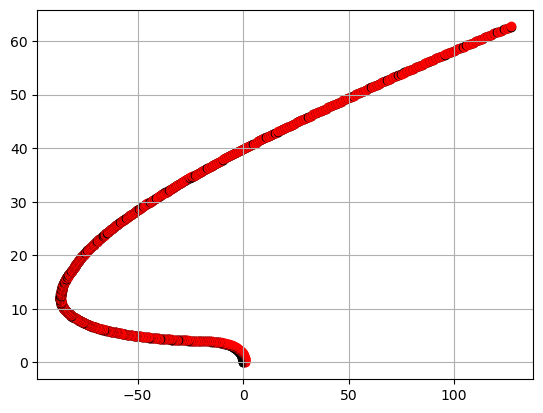

In [14]:
pos = i_positions
vel = i_velocities
fig =  plt.figure()
ax = fig.add_subplot()
for i in range(no_steps):
    print(f"pos {pos[0]}")
    ax.scatter(pos[0,0], pos[0,1], color = "k")
    ax.scatter(pos[1,0] ,pos[1,1], color = "red")
    #ax.scatter(pos[2,0] ,pos[2,1], color = "blue")
    time = i *time_step
    Data_save(p=pos, v=vel, E=0, L=0, t=time, f_name = file_name)
    new_pos, new_vel = Verlet(pos_v=pos, vel_v=vel, ma=masses, ep=epsilon, G=G, t_s=time_step)     #Calling verlet intergrator

    
    #print(new_pos)
    print(f"vel-new_vel {vel-new_vel}")
    pos = new_pos
    vel = new_vel

ax.grid(True)
    

    

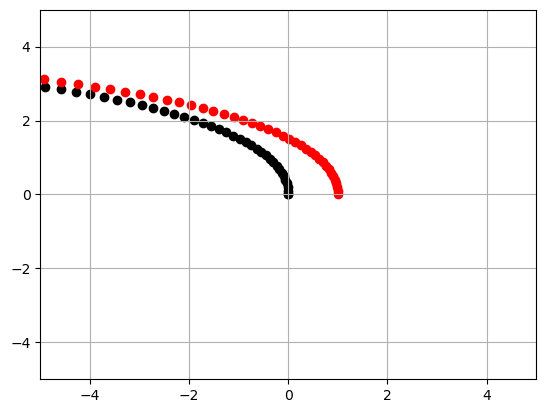

In [18]:
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
fig

In [16]:
pos

array([[128.33596362,  62.96811159],
       [128.33073652,  62.9675869 ]])

In [17]:
vel

array([[147.89162854,  24.88249101],
       [148.9077904 ,  24.98449254]])

res = pd.read_csv("produced_data_system_0.txt",delim_whitespace=True)
res

p1_posx = res["p1x"]
p1_posy = res["p1y"]

fig1 =  plt.figure()
ax1 = fig1.add_subplot()
d = np.array([p1_posx,p1_posy])
ax1.plot(d[0],d[1])